In [3]:
#Import requests for web scraping
import pandas as pd
import numpy as np
import collections

# Matplotlib and associated plotting
import matplotlib.cm as cm
import matplotlib.colors as colors 

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

print('Libraries installed')


Libraries installed


# Methodology 

In this case we won't use web scraping because the speech is recent, but we will use the auto-generated captions in youtube, the way to obtain this is very easy:

You go to the video, in this case [this link](https://www.youtube.com/watch?v=dAwWHxWdaM0), then you go to the three dots next to save video, click on show transcription and then, you will click again in the three dots, where you have to deactivate the time, after to do this, you have to copy and paste in a plain text file.


In [4]:
with open('discurso.txt',encoding='utf8') as f:
    lines = f.readlines()
    f.close()
#Removing /n in the speech
#using loop 
res = []
for sub in lines:
    res.append(sub.replace("\n",""))

#Convert into a str
data = ' '.join(res)
data[0:530]

'llegar aquí junto a esta espada para mí Es toda una vida una existencia esta espada representa demasiado para nosotros para nosotros y quiero que nunca más esté enterrada quiero que nunca más esté retenida que solo se envaine Como dijo su propietario el libertador cuando haya justicia en este país que sea del pueblo es la Espada del pueblo y por eso la queríamos aquí en este momento Y en este lugar quizás para los próximos presidentes y presidentes cuando se posesionen se vuelva un hecho permanente protocolario simbólico que'

# What are Word Clouds? 
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. For this task, we will be using the python library called 'word_cloud' developed by **Andreas Mueller**. [Here](https://github.com/amueller/word_cloud/) you can find the repository and learn more about it.

In [5]:
!pip -q install wordcloud #Library for wordcloud

In [6]:
!pip -q install stop-words

In [7]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [8]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [21]:
stop_words = ["año", "mil", "millones", "pesos", "ciento", "El", "En"] + stop_words_es #Adding aditional StopWords
#initiate world cloud object
petro_wc = WordCloud(
    background_color='white',
    max_words=7000,
    stopwords=stop_words
)

# generate the word cloud
petro_wc.generate(data)

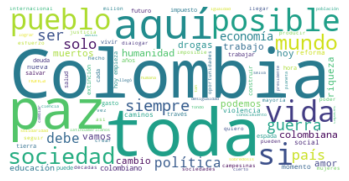

In [22]:
# display the word cloud
plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

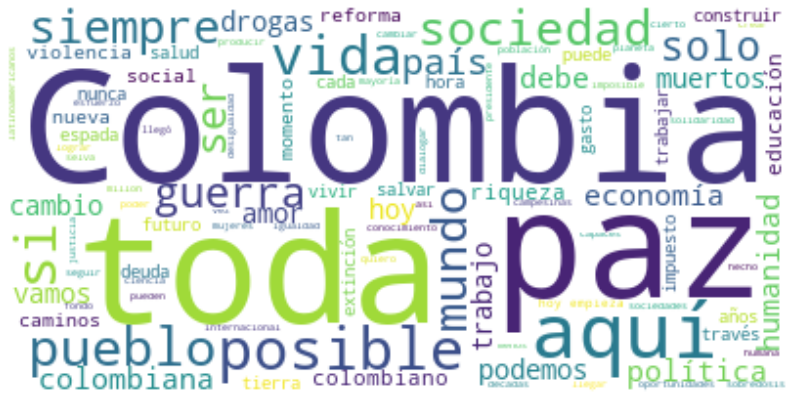

In [23]:
# re-generate the word cloud
petro_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Retrieving the image for the mask 




In [24]:
from PIL import Image


In [25]:
path = '/home/diego-aaa/Proyectos/colombianPresidentWordCloud/test2.png'
# save mask to co_mask
co_mask = np.array(Image.open(path))
print('Image downloaded and saved!')

#Found in vecteezy.com
#https://www.vecteezy.com/vector-art/3249591-simple-black-map-of-colombia-isolated-on-white-background



Image downloaded and saved!


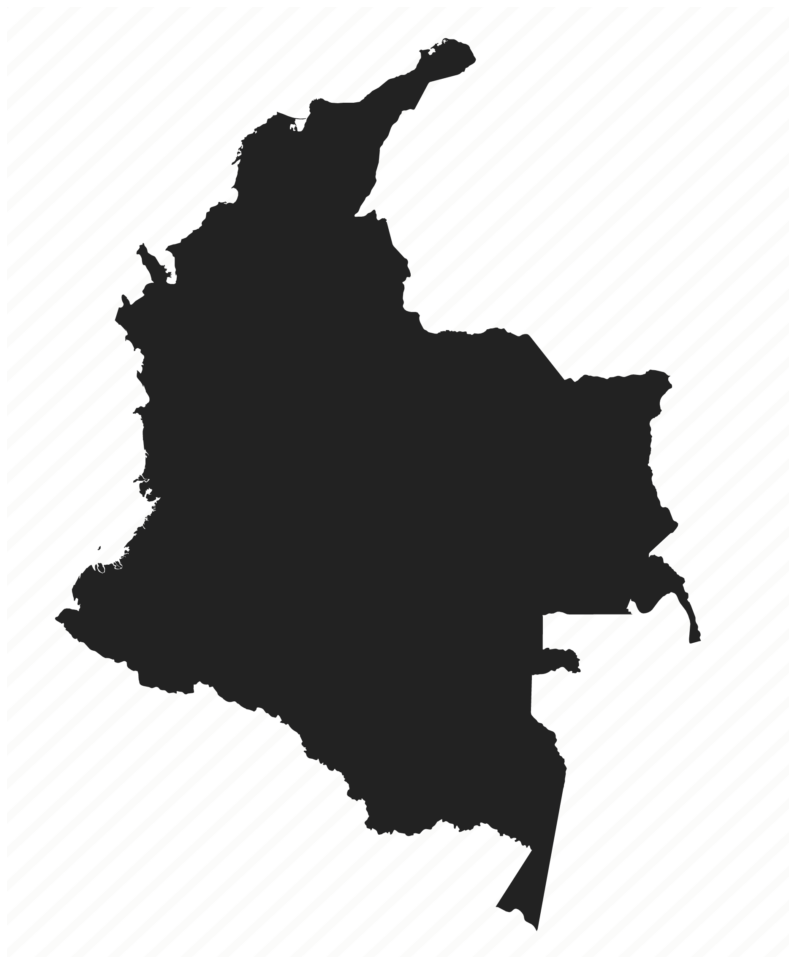

In [26]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(co_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()



---

Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words from the text.

In [41]:
# instantiate a word cloud object
petro_wc = WordCloud(background_color='white', max_words=2000, mask=co_mask, stopwords=stop_words)

# generate the word cloud
petro_wc.generate(data)


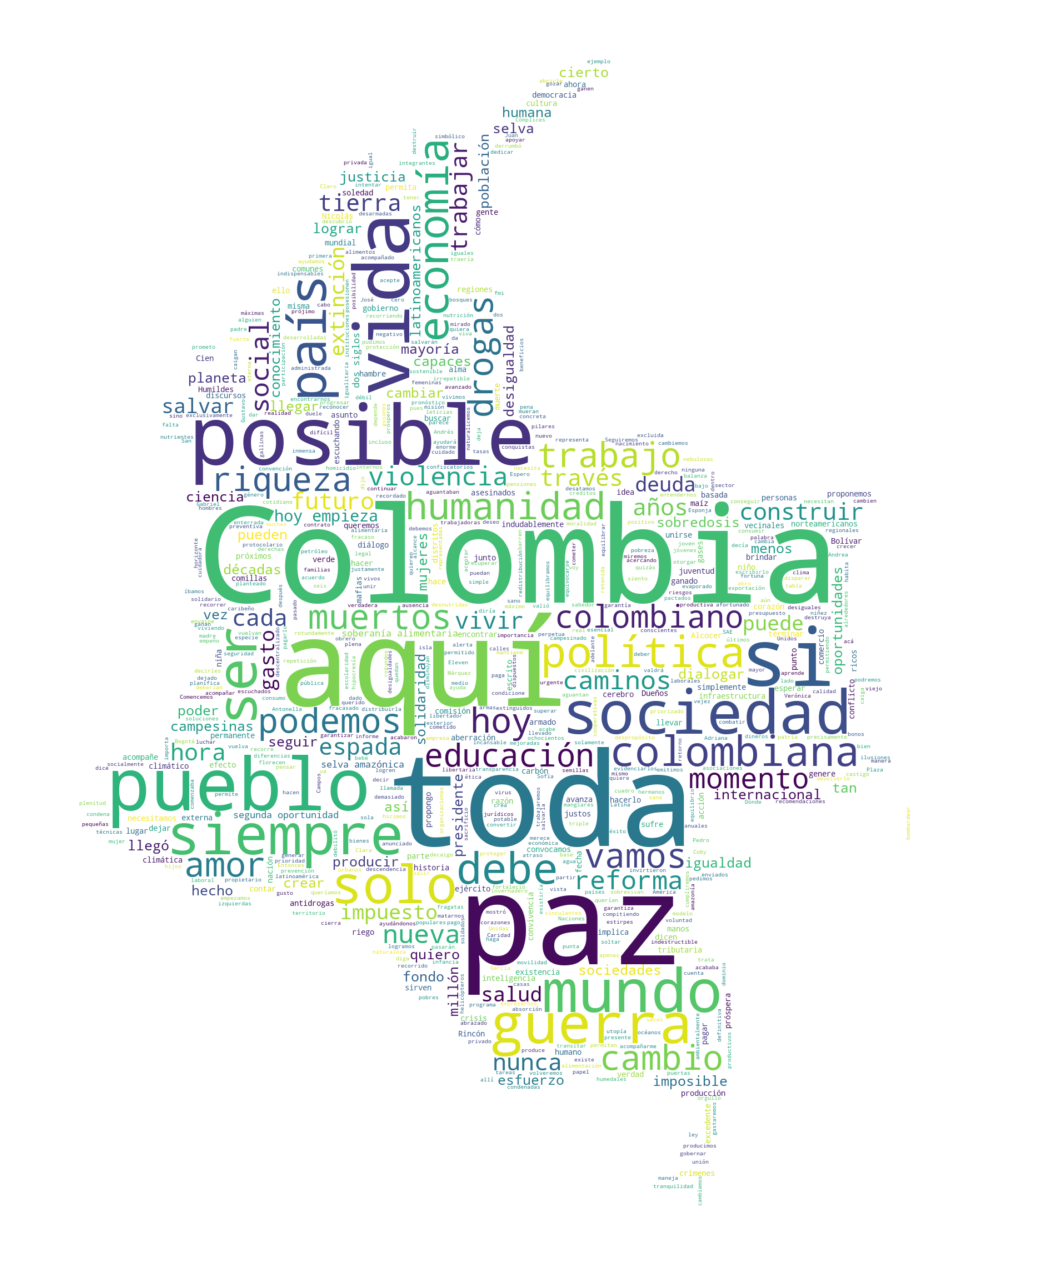

In [42]:
from matplotlib import pyplot as plt

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(23) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

fig.savefig('foo.png')
